# Import Libraries

In [1]:
import os
import cv2
import pandas as pd
import numpy as np
import glob
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
from sklearn.model_selection import train_test_split
from PIL import Image

import segmentation_models as sm
from sklearn.preprocessing import MinMaxScaler, StandardScaler

import random
import torch
import keras
from tensorflow.keras.metrics import MeanIoU
import requests
import pickle
import re
import os
import cv2

Segmentation Models: using `keras` framework.


# Define Input directories

In [11]:
#these codes are used to loop through the directory
path_images = 'rs19_val/jpgs/rs19_val/'
path_images_resized = 'rs19_val/960_512/images_resized/'
path_masks = 'rs19_val/uint8/rs19_val/'
path_masks_resized_track = 'rs19_val/960_512/masks_resized_track/'
path_masks_resized_veg ='rs19_val/mask_veg_resized_512_960/'


# read the tram list and turn it into a dict
tram_list = pd.read_csv('tram_filenames.csv')
tram_dict = tram_list.iloc[:,1:].to_dict()

# Define Labels

In [8]:
# pixel labels for each class
tram_track=3 
rail_track=12
track_bed= 15
rail_raised= 17
rail_embedded =18
veg = 8
terrain=9

# test images list

In [15]:
#test_list = ['rs00079','rs01562','rs02536','rs03764','rs04744','rs05410','rs07603','rs08095','rs08443']
test_list_veg_track= ['rs00275','rs00230','rs00039','rs00588', 'rs00320','rs00140','rs00600']

# Load Model Track

In [7]:
from keras.models import load_model

model_track = load_model("saved_model/track/alltram_960_512_track_batch_10_epoch20.hdf5", compile=False)


## Predict Tracks on the test_list

file_name :  rs00275
1/1 [==============================] - 1s 1s/step


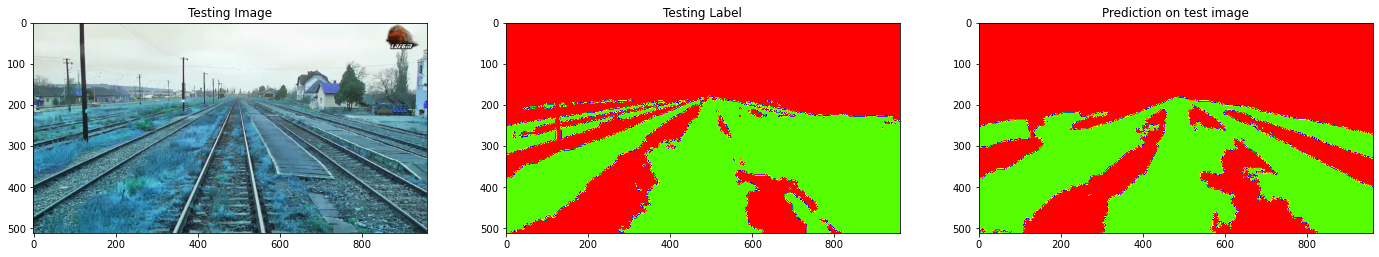

file_name :  rs00230
1/1 [==============================] - 2s 2s/step


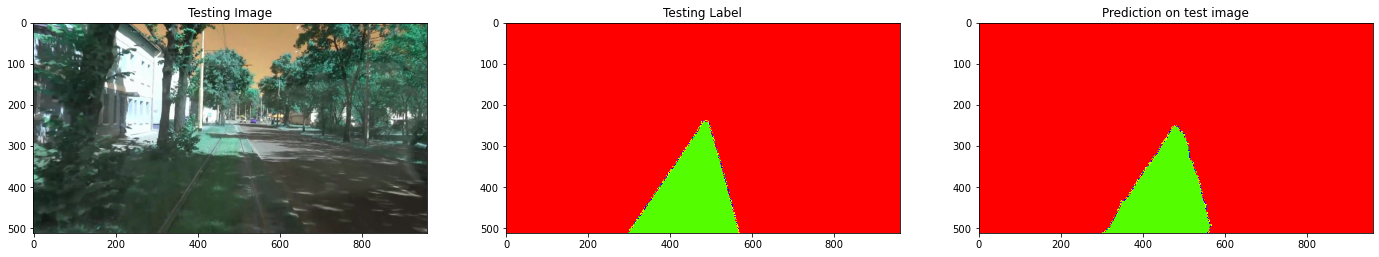

file_name :  rs00039
1/1 [==============================] - 2s 2s/step


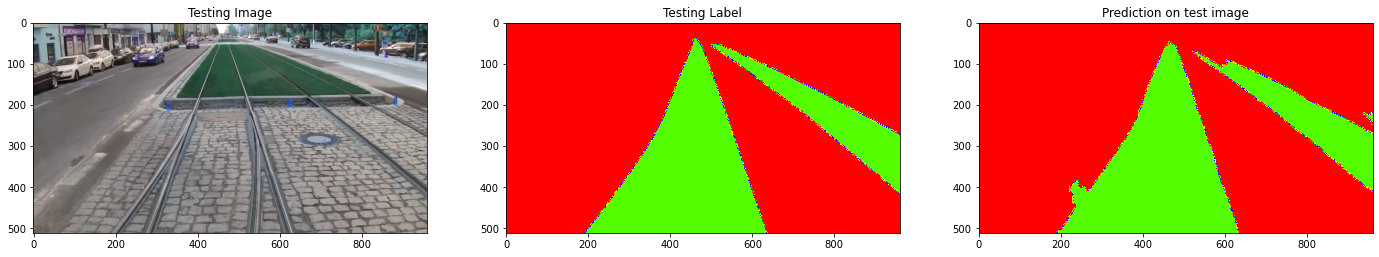

file_name :  rs00588
1/1 [==============================] - 2s 2s/step


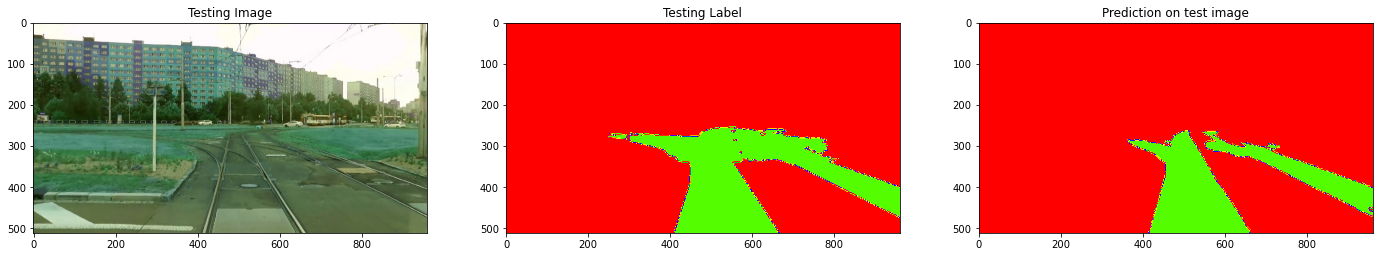

file_name :  rs00320
1/1 [==============================] - 2s 2s/step


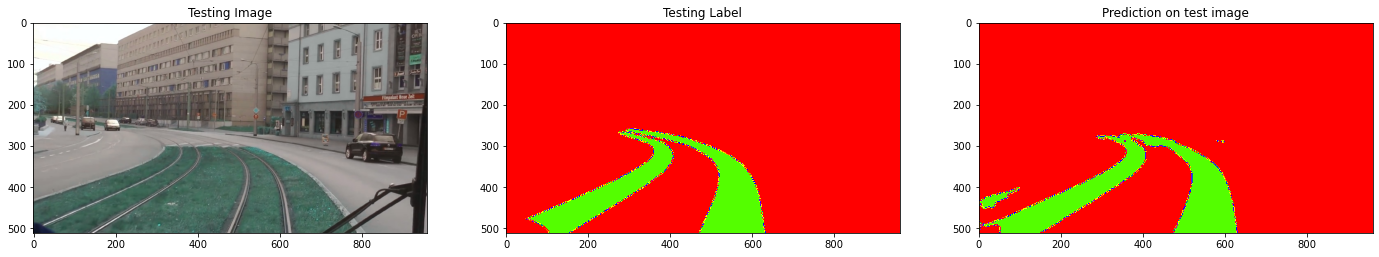

file_name :  rs00140
1/1 [==============================] - 2s 2s/step


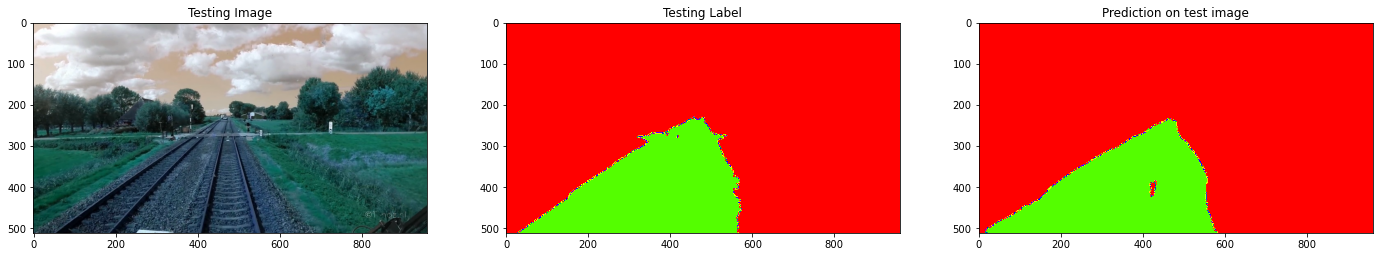

file_name :  rs00600
1/1 [==============================] - 2s 2s/step


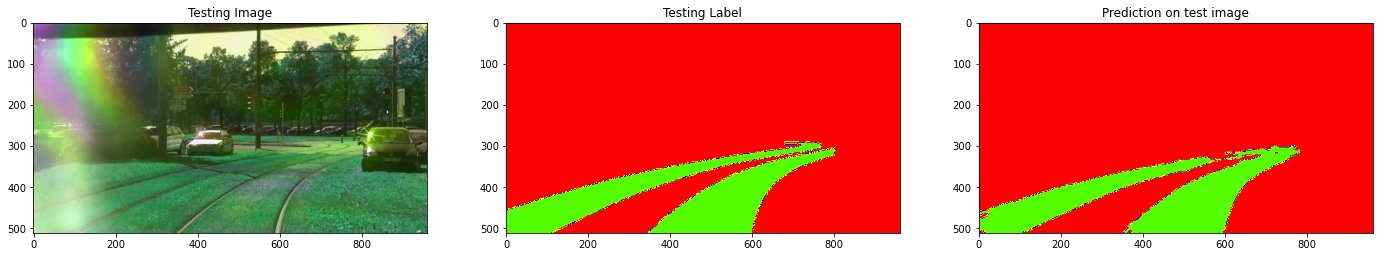

In [18]:
for imgfile in range(len(test_list_veg_track)):
    print("file_name : ",test_list_veg_track[imgfile])
    test_img= cv2.imread(path_images_resized+test_list_veg_track[imgfile]+'.jpg.jpg',1)
    #print('test_image shape',test_img.shape)
    
    ground_truth= cv2.imread(path_masks_resized_track+test_list_veg_track[imgfile]+'.png.png',0)
    #print("ground_truth shape",ground_truth.shape)

    test_img_input=np.expand_dims(test_img, 0) #this is to make (960,512, 1) -> (1, 960, 512, 1)
    #print("ground truth shape expanded", test_img_input.shape)

    prediction = (model_track.predict(test_img_input))
    #print("Prediction shape",prediction_custom.shape)
    my_threshold = 0.8
    predicted_img=(prediction>=my_threshold).astype(int)[0,:,:,:] #remove the first axis
    #print("Prediction_converted_shape",predicted_img_custom.shape)

    plt.figure(figsize=(24, 16))
    plt.subplot(231)
    plt.title('Testing Image')
    plt.imshow(test_img[:,:,:]) #the X_train and test has been processed wrt the BACKBONE above
    plt.subplot(232)
    plt.title('Testing Label')
    #plt.imshow(ground_truth_custom[:,:,0], cmap='prism')
    plt.imshow(ground_truth[:,:], cmap='prism')
    plt.subplot(233)
    plt.title('Prediction on test image')
    plt.imshow(predicted_img, cmap='prism')
    plt.show()